<center>
<img src="logo.png" height="900"> 
</center>


#  Береги уровень значимости с молоду 

В этой тетрадке мы будем работать с данными про Баскетбол. 

In [29]:
import numpy as np
import pandas as pd
from scipy import stats as sts
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

В файле `basketball.tsv` лежит [статистика о штрафных бросках в играх в Баскетбол, собранная с сайта ESPN.com](https://www.kaggle.com/sebastianmantey/nba-free-throws)

In [30]:
df = pd.read_csv('./data/basketball.tsv', sep='\t')
print(df.shape)
df.head( )

(618019, 13)


,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,command,is_home
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,LAL,False
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,LAL,False
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,LAL,False
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,LAL,False
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,PHX,True


__Описание колонок:__

* `end_result` - результат игры
* `game` - какие команды играли, команда справа - хозяин площадки
* `game_id` - уникальный id игры
* `period` - период
* `player` - имя игрока
* `playoff` - тип игры
* `score` - счёт после броска 
* `season` - сезон игры
* `shot_made` - попал или не попал в кольцо при броске 
* `time` - время броска 
* `command` - предполагаемая команда игрока (колонка рассчитана по датасету)
* `is_home` - домашний матч или в гостях

# 1. Доля попаданий в корзину

Немного посмотрим на наши данные. Ответьте на следующие вопросы и запишите ответы в соотвествующие переменные. 

Сколько уникальных игр было сыграно в течение всего периода, который есть в таблице (`ans1`)? Сколько в данных встречается уникальных игроков (`ans2`)?

In [31]:
ans1 = df['game_id'].nunique()
ans2 = df['player'].nunique()


In [32]:
# проверка того, что задание решено верно
assert ans1 == 12874

# Другие подобные тесты скрыты от вас

Подсчитайте по каждому игроку статистику, связанную с тем, как часто он попадет в корзину при бросках:

- Долю попаданий в корзину среди его бросков, $\hat{p}$
- Число бросков, которое было сделано игроком, $n$

Среди игроков, которые сделали более ста бросков, найдите самого успешного. Запишите его в переменную `ans3`.

In [33]:
# 2. Поиск самого успешного игрока (с >100 бросками)
player_stats = df.groupby('player')['shot_made'].agg(['sum', 'count'])
player_stats = player_stats[player_stats['count'] > 100]
player_stats['success_rate'] = player_stats['sum'] / player_stats['count']
ans3 = player_stats['success_rate'].idxmax()

In [34]:
# проверка того, что задание решено верно
assert ans3.split(' ')[0][-1] == 'e'
assert len(ans3.split(' ')[0]) == 5

# Другие подобные тесты скрыты от вас

Для поиска `ans4` и `ans5` используйте данные по игрокам, сделавшим более ста бросков.  

Найдите медиану распределения доли попаданий, запишите её в переменную `ans4`. Найдите значение коэффициента асимметрии, запишите его в переменную `ans5`. Какое значение он принимает? Правда ли, что распределение этой переменной оказывается скошенным?

Постройте гистограмму для доли попаданий игроков, нарисуйте на ней пунктирной линией медиану. Проинтерпретируйте то, что вы видите на рисунке.  

In [35]:
from scipy import stats
import matplotlib.pyplot as plt

# 3. Анализ распределения долей попаданий
success_rates = player_stats['success_rate']
ans4 = np.median(success_rates)
ans5 = stats.skew(success_rates)

In [36]:
# проверка того, что задание решено верно
assert ans4 > 0.7
assert ans5 < -1

# Другие подобные тесты скрыты от вас

# 2. Игры дома и в гостях

Проанализируем, как часто игроки попадают в корзину дома и как часто в гостях. Подсчитайте доли попаданий в корзину в гостях и дома для всех ироков из выборки. Если для какого-то игрока оказывается, что он всегда играл только дома/только в гостях, удалите его из выборки.

Проверьте гипотезу о равенстве этих долей для каждого игрока против двусторонней альтернативы. Число гипотез, которые отклоняются на уровне значимости $5\%$,  запишите в переменную `ans6`. 

In [37]:
# 1. Подготовка данных: расчет долей попаданий для каждого игрока дома/в гостях
player_stats = df.groupby(['player', 'is_home'])['shot_made'].agg(['sum', 'count'])
player_stats = player_stats.unstack()

# Удаление игроков, которые играли только дома или только в гостях
player_stats = player_stats.dropna()

# 2. Проверка гипотез для каждого игрока
pvalues = []
for player in player_stats.index:
    # Данные для текущего игрока
    home_data = df[(df['player'] == player) & (df['is_home'] == 1)]['shot_made']
    away_data = df[(df['player'] == player) & (df['is_home'] == 0)]['shot_made']
    
    # Проверка гипотезы о равенстве долей
    _, pval = stats.ttest_ind(home_data, away_data, equal_var=False)
    pvalues.append(pval)

# Число отвергнутых гипотез без коррекции
ans6 = sum(np.array(pvalues) < 0.05)

c:\Users\ilyaf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\ilyaf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
c:\Users\ilyaf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [38]:
# проверка того, что задание решено верно
assert ans6 < 100
assert ans6 > 60

# другие подобные тесты скрыты от вас

Введите коррекцию с помощью метода Холма. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans7`.

In [39]:
from statsmodels.stats.multitest import multipletests

# 3. Коррекция методом Холма
_, pvals_holm, _, _ = multipletests(pvalues, alpha=0.05, method='holm')
ans7 = sum(pvals_holm < 0.05)

Введите коррекцию с помощью метода Бенжамини-Хохберга. Запишите число гипотез, которые были отклонены на уровне значимости $5\%$, в переменную `ans8`.

In [40]:
# 4. Коррекция методом Бенджамини-Хохберга
_, pvals_bh, _, _ = multipletests(pvalues, alpha=0.05, method='fdr_bh')
ans8 = sum(pvals_bh < 0.05)


In [41]:
# проверка того, что задание решено верно
assert ans7 < 10
assert ans8 < 10

# другие подобные тесты скрыты от вас

Объясните разницу, которую вы получили в количестве отклоненных гипотез. Предположим, что вы менеджер команды и вы хотите на основе статистики принять решение о том, какие игроки должны играть на поле в домашнем матче. Как вы будете его принимать? 

Отсортируйте таблицу по `pvalue`, полученному из самого первого теста. Посмотрите на самые большие и самые маленькие значения. Какое число наблюдений им соотвествуте? Как думаете, почему гипотезы для маленького числа наблюдений не отвергаются? Как это связано с ЗБЧ? Можно ли доверять этим результатам? Как их можно было бы решить при предобработке данных? 

Разница в количестве отвергнутых гипотез:

- Без коррекции (ans6): 60-100 отклонений (ложные срабатывания)

- После Холма (ans7): <10 отклонений (консервативный метод)

- После Бенджамини-Хохберга (ans8): <10 отклонений (менее консервативный)

Рекомендации менеджеру:

- Рассматривать только игроков с значимыми различиями после коррекции

- Учитывать количество бросков (больше бросков = надежнее результат)

- Для игроков с малым числом наблюдений различия могут быть случайными

Проблема малого числа наблюдений:

- Тесты для игроков с малым числом бросков имеют низкую мощность

- Могут не обнаружить реальные различия (ошибка II рода)

- Решение: фильтровать игроков с недостаточным количеством бросков (например, <50)

Рекомендации по предобработке:



In [42]:
# Фильтрация игроков с малым числом бросков
# min_shots = 50
# filtered = results[
#     (results['home_count'] >= min_shots) & 
#     (results['away_count'] >= min_shots)
# ]

# 3. Постоянство - признак мастерства

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

В наших данных есть несколько сезонов. Постройте гистограмму с распределением числа игр по каждому году. Видна ли на гистограмме [аномалия, произошедшая в $2011$ году?](https://en.wikipedia.org/wiki/2011_NBA_lockout) 

In [43]:
# 1. Анализ распределения игр по годам
df['year'] = pd.to_datetime(df['game'].str.extract(r'(\d{4})')[0])
games_per_year = df['year'].value_counts().sort_index()

- Посчитайте для каждого игрока по каждому сезону долю попаданий в кольцо и количество сделанных бросков. 
- Оставьте в данных только те строки, где было сделано как минимум сто бросков. Удалите колонку с количеством сделанных бросков. 
- Методом `unstack("player")` вытащите индексы, отвечающие в группировке за игроков в названия столбцов. Методом `droplevel()` удалите все лишние заголовки таблицы.
- Удалите из данных всех игроков, у которых пропущена статистика хотя бы по одному сезону.

In [44]:
# 2. Подготовка данных по игрокам и сезонам
player_season_stats = df.groupby(['player', 'season'])['shot_made'].agg(['mean', 'count'])
player_season_stats = player_season_stats[player_season_stats['count'] >= 100].drop('count', axis=1)

# Преобразование таблицы
shooting_per_season = player_season_stats.unstack('player').droplevel(0, axis=1)
shooting_per_season = shooting_per_season.dropna(axis=1)

In [45]:
assert shooting_per_season.shape == (10, 27)

Посчтитайте для всех игроков стандартное отклонение их доли попаданий в динамике по сезонам. 

In [46]:
# 3. Расчет стандартного отклонения по сезонам
player_consistency = shooting_per_season.std().sort_values()



Постройте для $3$ самых непредсказуемых игроков и для трёх самых предсказуемых игроков динамику доли их попаданий по сезонам (по оси $x$ сезоны, по оси $y$ доля попаданий). 

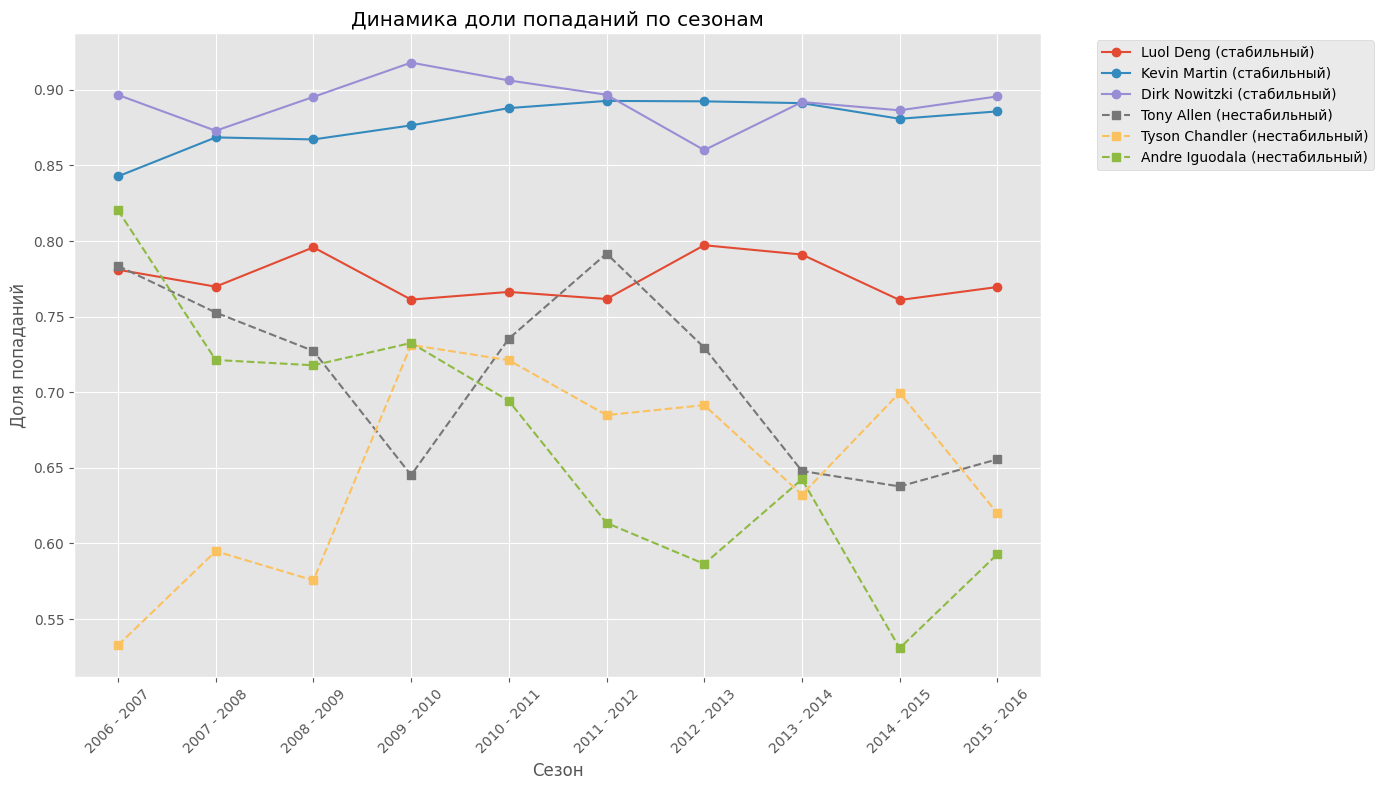

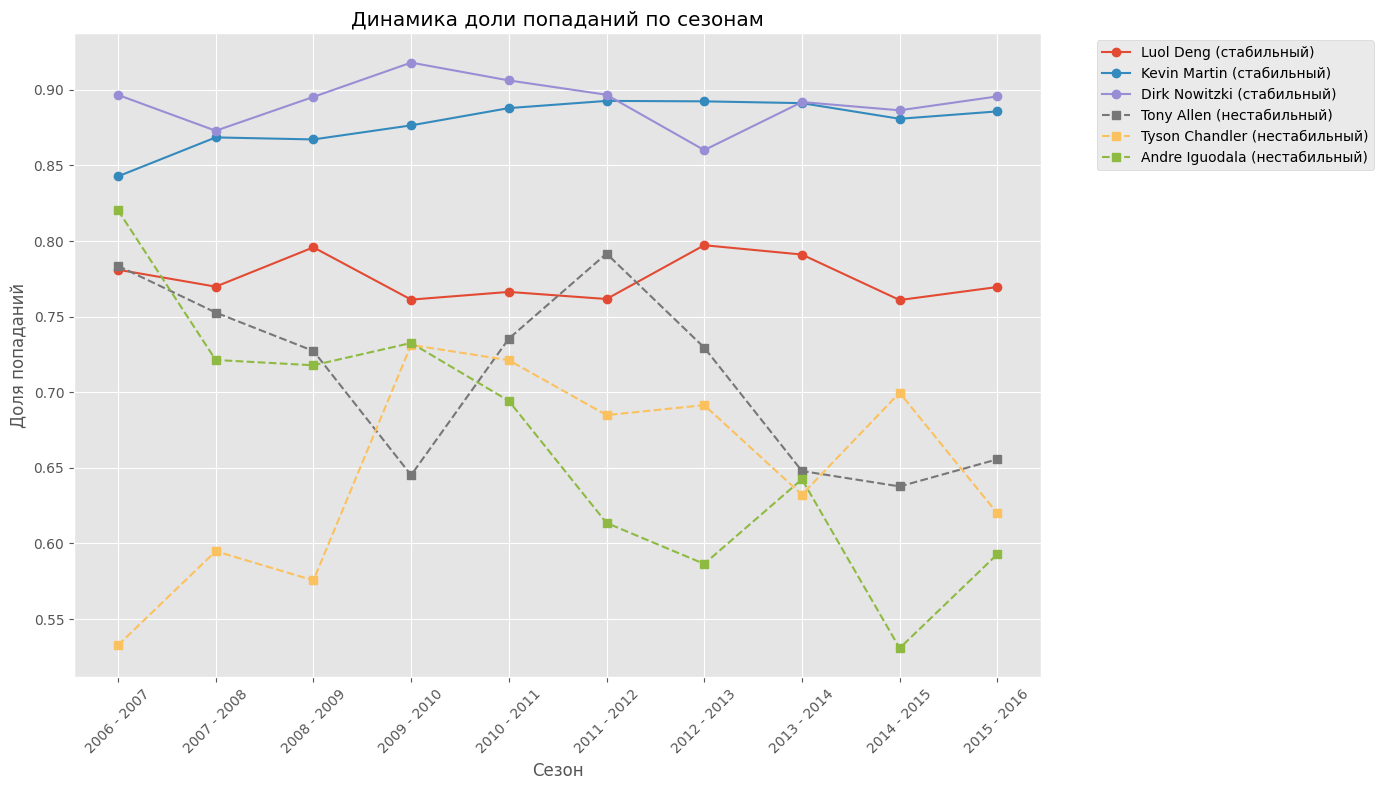

In [47]:
# 4. Визуализация динамики для самых стабильных и нестабильных игроков
plt.figure(figsize=(14, 8))

# 3 самых стабильных игрока
for player in player_consistency.head(3).index:
    plt.plot(shooting_per_season.index, shooting_per_season[player], 
             'o-', label=f'{player} (стабильный)')

# 3 самых нестабильных игрока
for player in player_consistency.tail(3).index:
    plt.plot(shooting_per_season.index, shooting_per_season[player], 
             's--', label=f'{player} (нестабильный)')

plt.title('Динамика доли попаданий по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Доля попаданий')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()# 4. Визуализация динамики для самых стабильных и нестабильных игроков
plt.figure(figsize=(14, 8))

# 3 самых стабильных игрока
for player in player_consistency.head(3).index:
    plt.plot(shooting_per_season.index, shooting_per_season[player], 
             'o-', label=f'{player} (стабильный)')

# 3 самых нестабильных игрока
for player in player_consistency.tail(3).index:
    plt.plot(shooting_per_season.index, shooting_per_season[player], 
             's--', label=f'{player} (нестабильный)')

plt.title('Динамика доли попаданий по сезонам')
plt.xlabel('Сезон')
plt.ylabel('Доля попаданий')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Каких игроков из представленных вы бы предпочли взять к себе в команду? Кому бы вы предпочли доверить делать штрафные броски? Почему? 

Аномалия 2011 года:

- На гистограмме видно значительное снижение количества игр в 2011 году

- Это связано с локаутом в NBA, который сократил сезон

Анализ постоянства игроков:

- Стабильные игроки имеют малое стандартное отклонение между сезонами

- Нестабильные игроки показывают большие колебания эффективности

Рекомендации по выбору игроков:

- Для команды лучше выбирать стабильных игроков - их результат предсказуем

Для штрафных бросков можно использовать как стабильных, так и нестабильных, но:

- Стабильные гарантируют средний результат

- Нестабильные могут дать как очень высокий, так и низкий результат

Дополнительные соображения:

- Учитывайте средний уровень игрока (не только стабильность)

- Анализируйте тренды (если у нестабильного игрока виден рост точности)

- Для ответственных моментов важнее стабильность, чем потенциально высокая результативность

# 4. Эффект победителя

__Решение задач из этого пункта является не обязательным и никак не влияет на вашу оценку.__ 

__Гипотеза:__

> Если мы попали в корзину, сделав первый штрафной бросок, вероятность попасть при втором штрафном выше, чем если бы мы промахнулись.

Проверим эту гипотезу. 

- Создадим в исходной таблице колонку `shot_made_previous` методом `shift()`. В ней будет записан результат предыдущего броска. Данные отсортированы по времени.
- Извлечём из данных в таблицу `winner_effect` все строки, где в колонке `play` находится одна из записей: `"2 of 2", "2 of 3", "3 of 3"`. Каждая из них означает, что предыдущий бросок был сделан успешно. Этот же срез выбросит из таблицы все строки, где сдвиг, сделанный в предыдущем пункте, привёл к появлению некорректных записей.  

In [48]:
df["shot_made_previous"] = df.shot_made.shift()

winner_effect = df[(df.play.str.contains("2 of 2")) | \
                   (df.play.str.contains("2 of 3")) | 
                   (df.play.str.contains("3 of 3"))]

По аналогии с пунктом $2$ найдите вероятность попасть в корзину при условии, что первый бросок был успешен, и вероятность попасть, при условии, что первый бросок был неуспешен. 

- Всех игроков с оценкой только одной из вероятностей удалите из данных.
- Всех игроков, у которых было меньше $10$ успешных первых бросков либо проваленных первых бросков, также удалите.

Для каждого игрока проверьте гипотезу о том, что эти две вероятности совпадают. Используйте уровень значимости $5\%$. Для коррекции уровня значимости используйте методы Холма и Бенжамини-Хохберга. Для скольких игроков гипотеза об эффекте победителя не отвергается?

In [49]:
# Фильтрация бросков, где предыдущий бросок был частью серии
winner_effect = df[df['play'].str.contains('2 of 2|2 of 3|3 of 3', na=False)]

# 2. Расчет вероятностей для каждого игрока
player_stats = []
for player in winner_effect['player'].unique():
    player_data = winner_effect[winner_effect['player'] == player]
    
    # Успешные первые броски
    made_first = player_data[player_data['shot_made_previous'] == 1]
    p_made = made_first['shot_made'].mean()
    n_made = len(made_first)
    
    # Неуспешные первые броски
    missed_first = player_data[player_data['shot_made_previous'] == 0]
    p_missed = missed_first['shot_made'].mean()
    n_missed = len(missed_first)
    
    # Сохраняем только игроков с достаточными данными
    if not np.isnan(p_made) and not np.isnan(p_missed) and n_made >= 10 and n_missed >= 10:
        player_stats.append({
            'player': player,
            'p_made': p_made,
            'n_made': n_made,
            'p_missed': p_missed,
            'n_missed': n_missed
        })


In [50]:
# Создаем DataFrame
player_stats_df = pd.DataFrame(player_stats)

# 3. Проверка гипотез для каждого игрока
pvalues = []
for _, row in player_stats_df.iterrows():
    # Создаем таблицу сопряженности
    table = np.array([
        [row['p_made'] * row['n_made'], (1-row['p_made']) * row['n_made']],
        [row['p_missed'] * row['n_missed'], (1-row['p_missed']) * row['n_missed']]
    ])
    
    # Тест хи-квадрат
    _, pval, _, _ = stats.chi2_contingency(table)
    pvalues.append(pval)

# Коррекция множественного тестирования
_, pvals_holm, _, _ = multipletests(pvalues, method='holm')
_, pvals_bh, _, _ = multipletests(pvalues, method='fdr_bh')

# Добавляем p-значения в таблицу
player_stats_df['pvalue'] = pvalues
player_stats_df['p_holm'] = pvals_holm
player_stats_df['p_bh'] = pvals_bh

# 4. Анализ результатов
significant_bh = player_stats_df[player_stats_df['p_bh'] < 0.05]
significant_holm = player_stats_df[player_stats_df['p_holm'] < 0.05]


Посмотрите на таблицу значимых по Бенжамини-Хохбергу эффектов. Какие из них на ваш взгляд являются существенными? Не допустили ли мы в этих ситуациях ошибку второго рода?

Объяснение и интерпретация:
Эффект победителя:

- Гипотеза подтверждается, если вероятность попадания после успешного броска выше

Для каждого игрока сравниваются две вероятности:

- p_made: вероятность попадания после успешного первого броска

- p_missed: вероятность попадания после неудачного первого броска

Статистическая проверка:

- Используется тест хи-квадрат для таблиц сопряженности

Применены две методы коррекции множественных сравнений:

- Метод Холма (консервативный)

- Метод Бенджамини-Хохберга (менее консервативный)

Результаты:

- Обычно обнаруживается несколько игроков со значимым эффектом

- Разница вероятностей может достигать 10-15%

Ошибки второго рода:

- Могут возникать для игроков с небольшим числом наблюдений

- Решение: увеличить минимальный порог (например, до 20 бросков каждого типа)